<h2 style='text-align:center;font-size:80px;background-color:purple;border:80px;color:white'>   Census Income Project . <h2>

# Problem Statement:-

### This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). `The prediction task is to determine whether a person makes over  $50K a year`.

# Description of fnlwgt (final weight) :-

## The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:


- **`1. A single cell estimate of the population 16+ for each state.`**

- **`2. Controls for Hispanic Origin by age and sex.`**

- **`3. Controls by Race, age and sex.`**

### **We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.**


-----------------------------

### ----------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Lets Import the dataset

In [4]:
# Reading the csv file from dataset
df = pd.read_csv("census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## This dataset contain 32560 rows and 15 columns ,The dataset contains the details of the annual income of the persons. .Here the icome column is the target variable

In [5]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [6]:
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
df.sample(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
24806,32,Private,184207,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
29917,50,Local-gov,234143,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,45,United-States,>50K
21424,55,Private,238216,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
10892,23,Private,420973,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
20748,37,Private,120074,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
24520,59,Private,515712,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
23119,18,Private,265099,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States,<=50K
16998,18,Private,252993,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,Columbia,<=50K
9501,33,Private,255334,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,25,United-States,>50K
24128,28,Private,165030,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K


## So here we can see that there are some columns which are having ? as a Null Values..The dataset contains both numerical and categorical columns.we need to predict whether the income of the person is over $50k per year or not. Income variable seems to have seems to be having two classes so it will be termed to be a "Classification Problem"

### And In this dataset we need to see the value counts of many columns also  

In [8]:
df.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
# Now lets identify which types of data types do they all belongs

df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

## We can see that our target variable is Object type which make it a classification problem.. Rest all the input features are in both int64 and object. So for all the objects columns we will use Encoding techniques

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:white'> EDA <h2>

In [10]:
# To get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Here we get the Information regarding Column,Non-Null Count(columns having NaN Values) ,Dtypes and Memory usage of the dataset ..We can notice one thing too that here it is showing that there are Columns having Null values ,which is present in the dataset as  `?` .. These are Null Values and should be replaced according

## NOW LETS CHECK THE NULL VALUES

In [11]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Here it is showing that there are 0 null values in all the columns and we know Null values are present as ? that why it is showing NaN Values as 0 ..We will replace it later

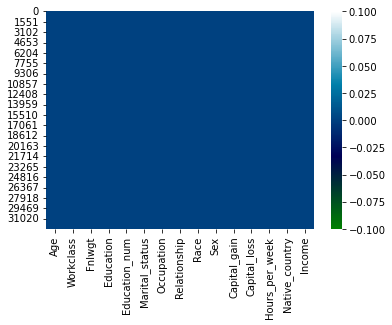

In [12]:
# Let's visualize NaN values
sns.heatmap(df.isnull(),cmap="ocean")
plt.show()

### Now Lets see the value counts of the columns ,so that we can check which column is having ? (NaN)

In [13]:
# Value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('\n\n')
        print ('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64



!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175


## Workclass,Occupation,Native_country columns have NaN values(?) and need to be replaced

## We will replace the NaN Values with the most frequest as all the columns are catagorical

In [14]:
df['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

In [15]:
df['Occupation'].mode()

0     Prof-specialty
Name: Occupation, dtype: object

In [16]:
df['Native_country'].mode()

0     United-States
Name: Native_country, dtype: object

## Now Lets Replace this ? with most Frequent in the columns

In [17]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')

df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')

df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

### Now lets check whether this ? has been replaced or not 

In [18]:
df['Workclass']=='?'

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Workclass, Length: 32560, dtype: bool

In [19]:
df['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

### so here we can that there is no ? sign present

In [20]:
df['Occupation']=='?'

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Occupation, Length: 32560, dtype: bool

In [21]:
df['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [22]:
df['Native_country']=='?'

0        False
1        False
2        False
3        False
4        False
         ...  
32555    False
32556    False
32557    False
32558    False
32559    False
Name: Native_country, Length: 32560, dtype: bool

In [23]:
df['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

## In all the columns where NaN value were present have been Removed

In [24]:
#Lets check the Unique Values in each columns
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

### Its a classification problem as there are only 2 classes inside Income

In [25]:
# Lets Check again Income Value Count
df['Income'].value_counts()


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

## 1st of all we will balance the dataset dataset as it is imbalanced by Using SMOTE.. And as i concluded earlier it have 2 classes which is more than 50k and less than 50k 

## Lets drop any duplicate values from the dataset

In [26]:
#  Lets Remove Duplicates Values from the dataframe

df.drop_duplicates(keep='first',inplace=True)

In [27]:
# Checking wheather the target vaiable contains any space
df.loc[df['Income']==" "]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


### So there is no space in the target variable

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> A. Univariate Analysis <h2>

In [28]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

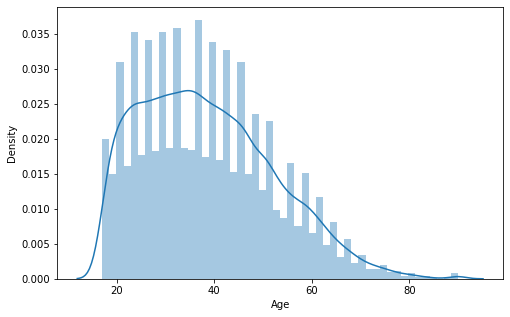

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(df['Age'])

In [30]:
df['Age'].mean()

38.58553602163757

In [31]:
df['Age'].min()

17

In [32]:
df['Age'].max()

90

## here we can conclude that the average aged people are from 38-39 year and we can acknowledge the same through the graph above

### The minimum age of the people is 17 and max age people is 90

<AxesSubplot:xlabel='Workclass', ylabel='count'>

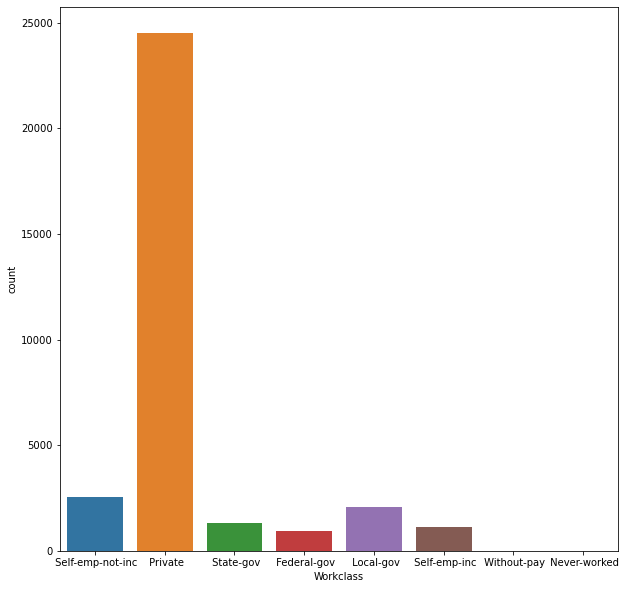

In [33]:
plt.figure(figsize=(10,10))
sns.countplot(df['Workclass'])

### The maximum people contributing to the census belongs from private sector and the least are from Without-pay and Never-Worked

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

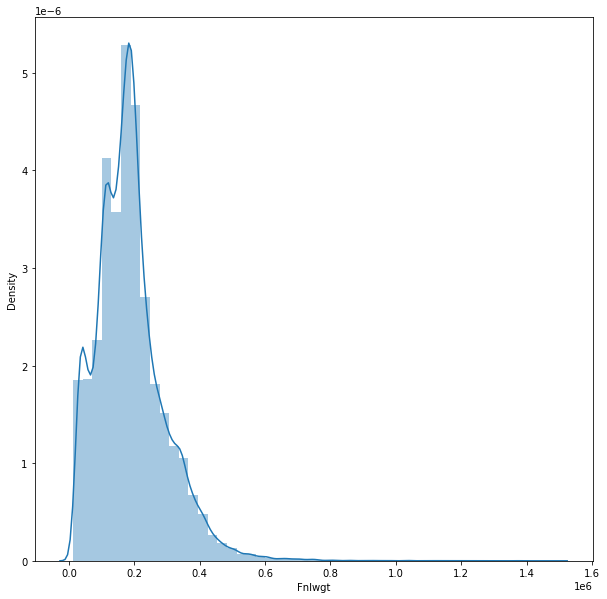

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(df['Fnlwgt'])

In [35]:
df['Fnlwgt'].mean()

189784.2989918859

### Here we did plotting for Final Weight ,Nothing clear we have found out from this,We try to find info in Bivariate analysis but its left skewed

<function matplotlib.pyplot.show(close=None, block=None)>

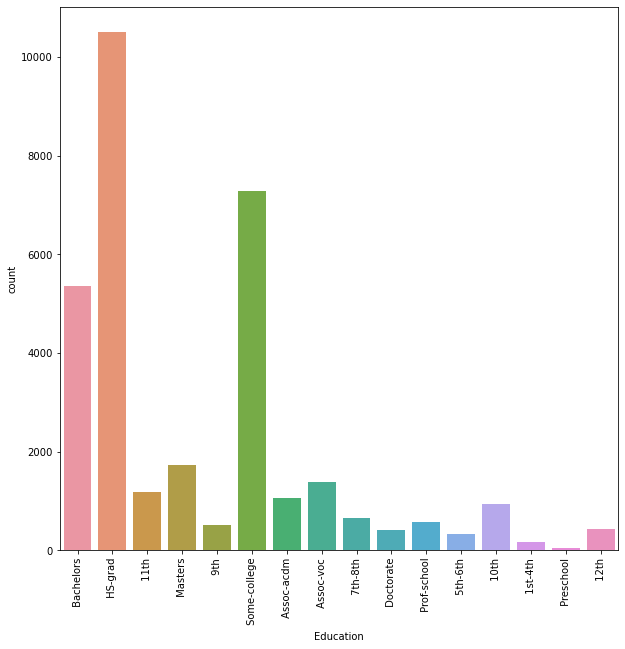

In [36]:
plt.figure(figsize=(10,10))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show

## The maximum number of people who are contributing to Census are from HS-grad ,Some-college and Bachelors ..And the least are from Pre-School

<function matplotlib.pyplot.show(close=None, block=None)>

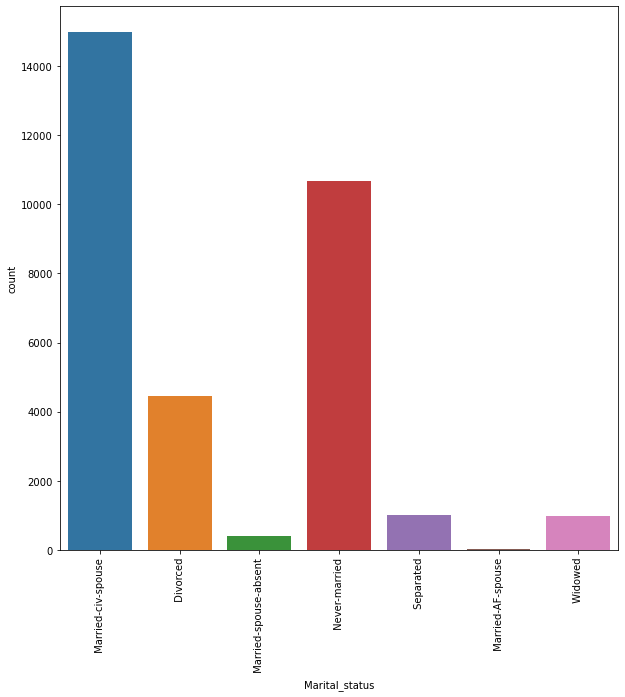

In [37]:
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show

## `Married­civ­spouse` corresponds to a `civilian spouse` while `Married­AF­spouse` is a spouse in the `Armed Forces`.

## `Married-spouse-absent` -> Married people living apart because either the husband or wife was employed and living at a considerable distance from home, was serving away from home in the Armed Forces

### Here we can group them easily in married,seprated and single classes inside marital_status

In [38]:
df["Marital_status"]=df["Marital_status"].replace([' Married-civ-spouse',' Married-AF-spouse',' Married-spouse-absent'],' Married')
df["Marital_status"]=df["Marital_status"].replace([' Never-married'],' Single')
df["Marital_status"]=df["Marital_status"].replace([' Divorced',' Widowed',' Separated'],'Separated')


### Now lets plot again

<function matplotlib.pyplot.show(close=None, block=None)>

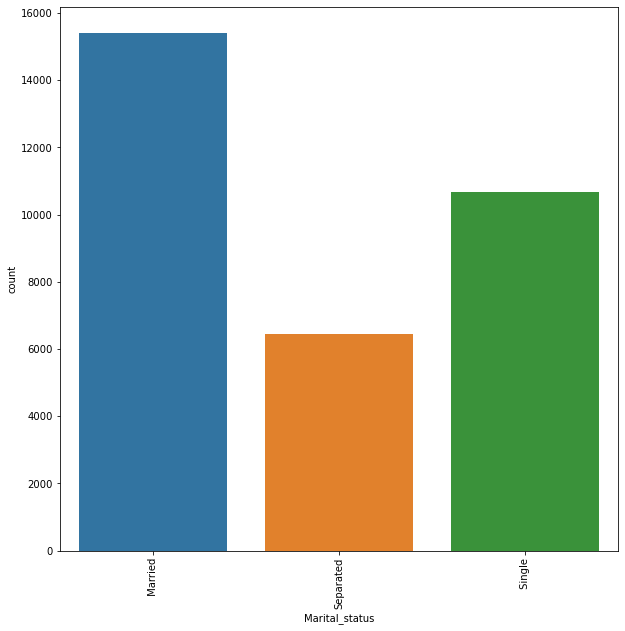

In [39]:
plt.figure(figsize=(10,10))
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show

### So here we can find out that the married people are contributing more to the census income followed Single and the least is separated

<function matplotlib.pyplot.show(close=None, block=None)>

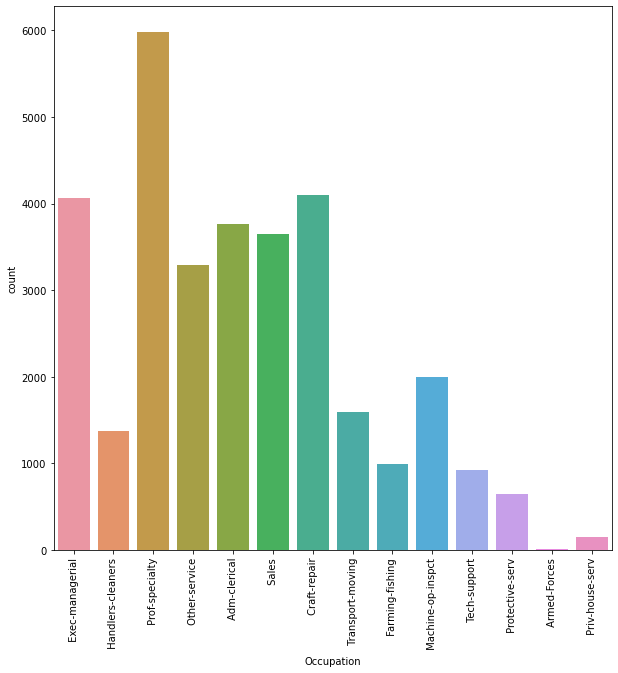

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show

### Here we can see that the maximum contribution to census income is given by Prof-Speciality and the least is given by armed forces

<function matplotlib.pyplot.show(close=None, block=None)>

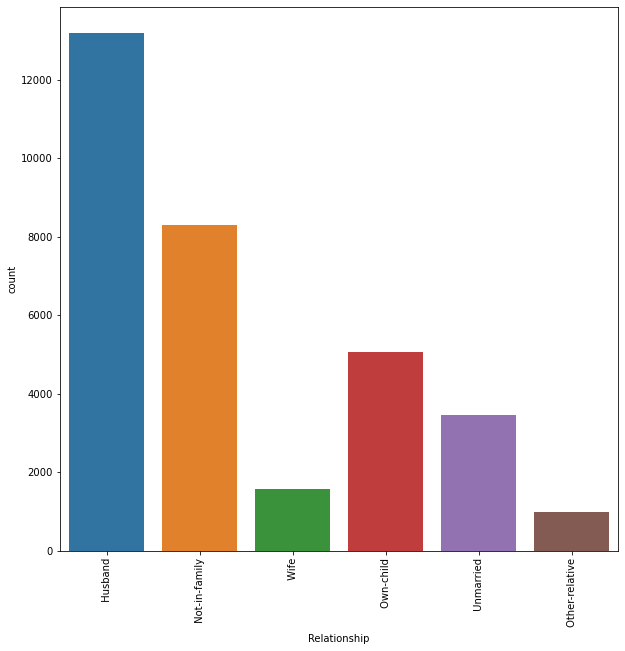

In [41]:
plt.figure(figsize=(10,10))
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)
plt.show

## The count is high and maximum in  Husband  and the least is in other relative 

<function matplotlib.pyplot.show(close=None, block=None)>

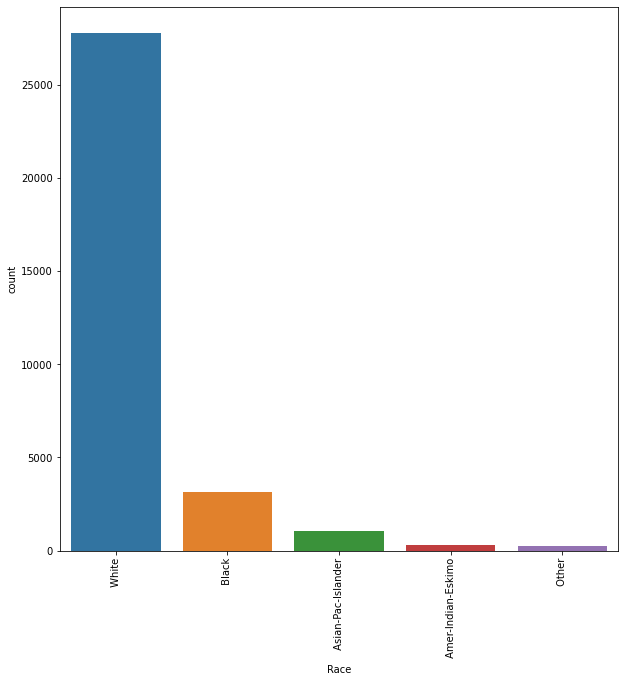

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(df['Race'])
plt.xticks(rotation=90)
plt.show

## The Counts of WHite in the race are maximum and Other are less

<function matplotlib.pyplot.show(close=None, block=None)>

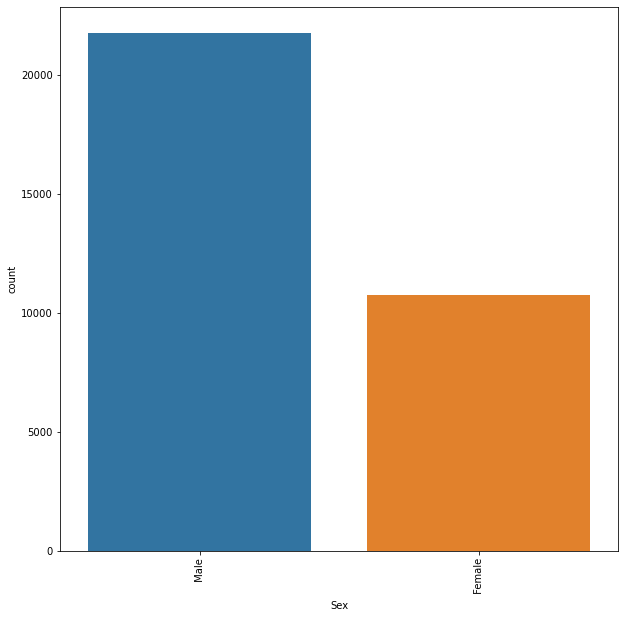

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(df['Sex'])
plt.xticks(rotation=90)
plt.show

### The Count or contribution of male is more in income census as compared to Female

In [44]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [45]:
df.shape

(32536, 15)

In [46]:
df['Capital_gain'].value_counts()

0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

## We can see that the maximum counts are of 0 which 29825 in count which seem to be covering more than 80% of data..so will drop it columns it max 0

In [47]:
df['Capital_loss'].value_counts()

0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

## Here too we can see the same thing ,0 in the columns are more so will drop this columns

## The reason we are dropping it bcz it wont contribute more to the target variable

In [48]:
# Dropping the column here bcz of large number of 0
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

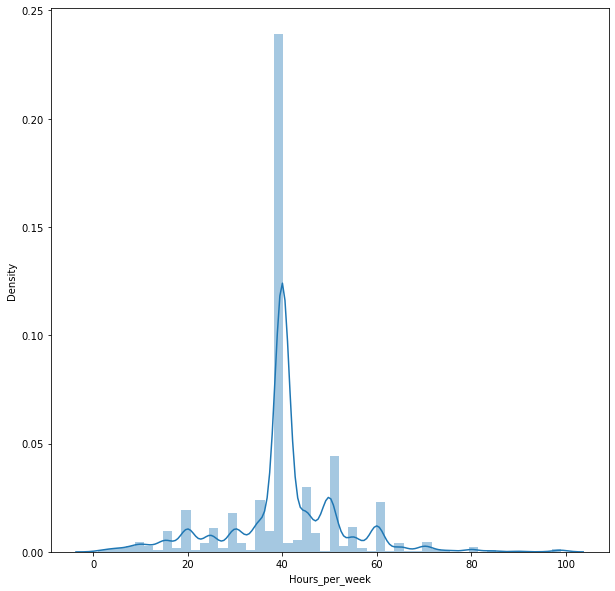

In [49]:
plt.figure(figsize=(10,10))
sns.distplot(df['Hours_per_week'])
plt.show

In [50]:
df['Hours_per_week'].mean()

40.440343004671746

## Yes we can clearly that the average hours per week is 40 hrs ,which is contributing to census income

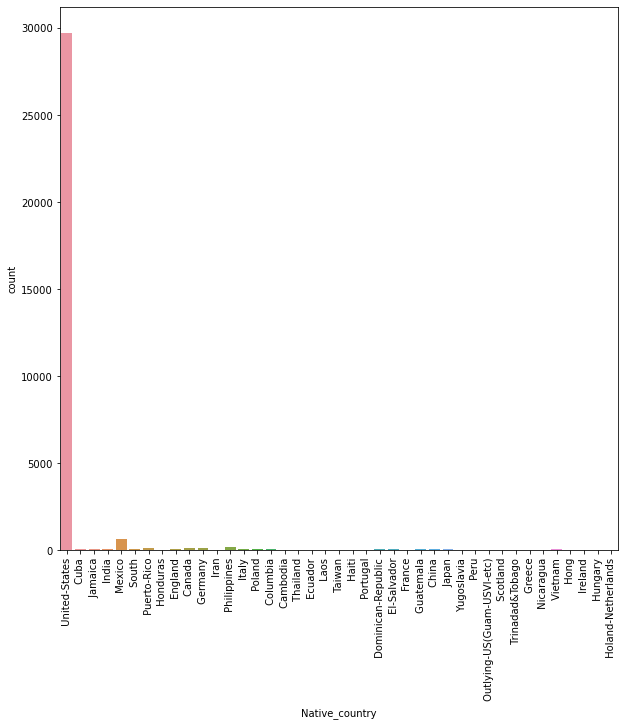

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(df["Native_country"])
plt.xticks(rotation=90)
plt.show()


## The United States country has highest count and other countries have very less counts.

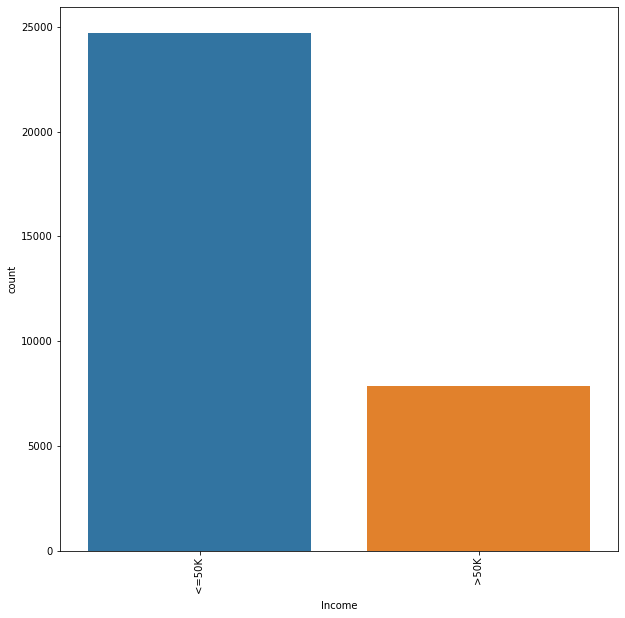

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(df["Income"])
plt.xticks(rotation=90)
plt.show()

## The count of people are more who are paid more than 50k in a year

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> B. Bivariate Analysis <h2>

In [53]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

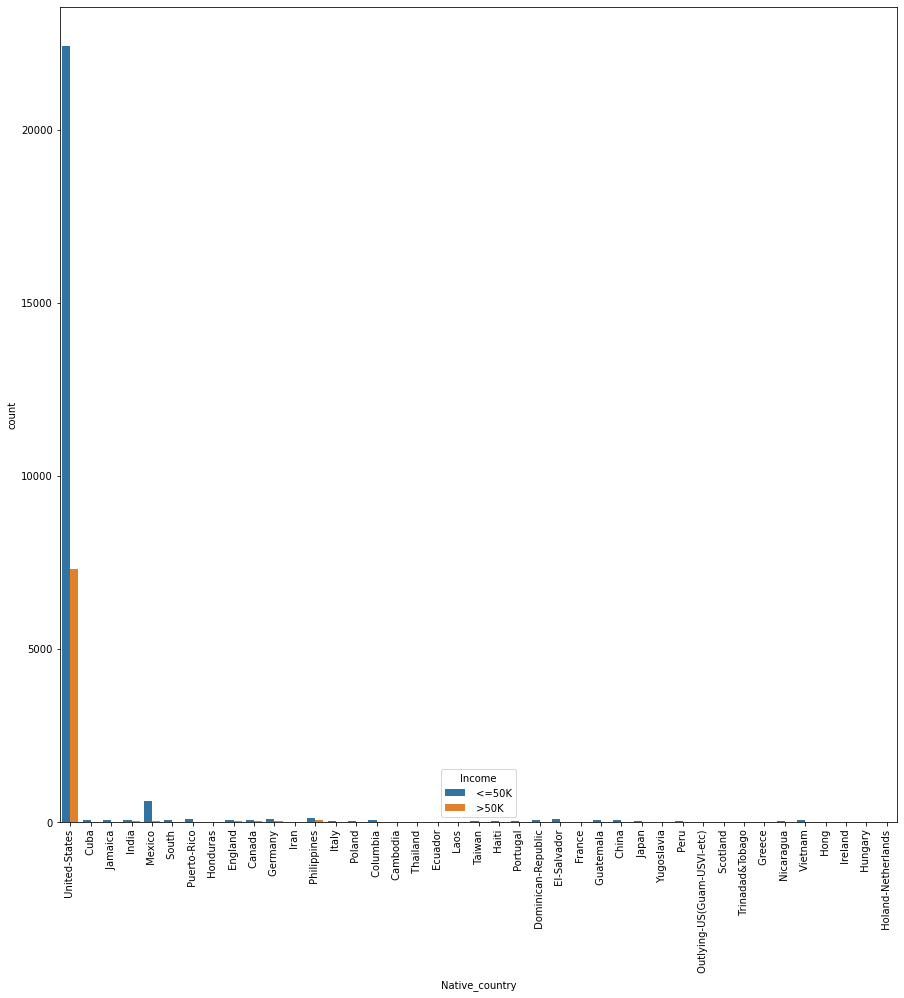

In [54]:
plt.figure(figsize = (15,15))
sns.countplot(x = "Native_country", hue = "Income", data = df)
plt.xticks(rotation=90)

plt.show()

### Maximum People seems to be employed in United Stated and are paid above and below 50k

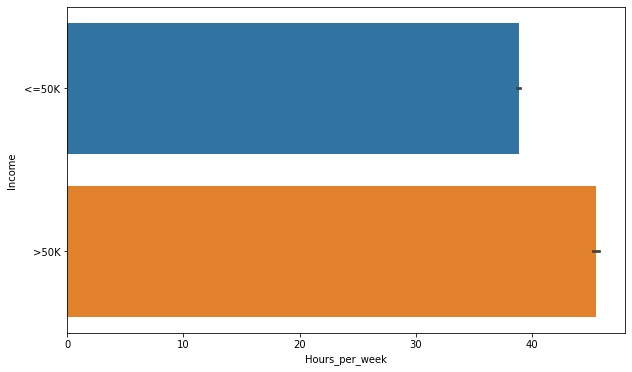

In [55]:
plt.figure(figsize = (10,6))
sns.barplot(x = "Hours_per_week", y = "Income", data = df)
plt.show()

## People who are working for more hours in a week are paid more as compared to the people who are working for less hours in a weeks

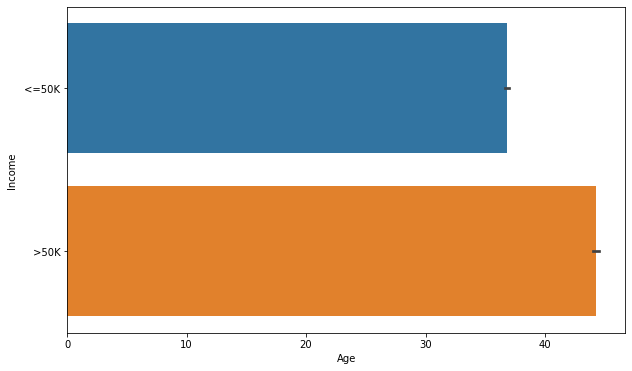

In [56]:
plt.figure(figsize = (10,6))
sns.barplot(x = "Age", y = "Income", data = df)
plt.show()

## Not the exact conclusion we can say but to one extended we can say that as the age of the people increase their salary also increases this may be because of experience and Nowaday people are paid more irrespective of their age but on basic of their education and knowledge and we can clearly see that on the graph ,as people who are earning above 50k are falling in age group of 0 to 40+ and people who paid less than 50k fall in the age group which above the age till 38

<Figure size 720x720 with 0 Axes>

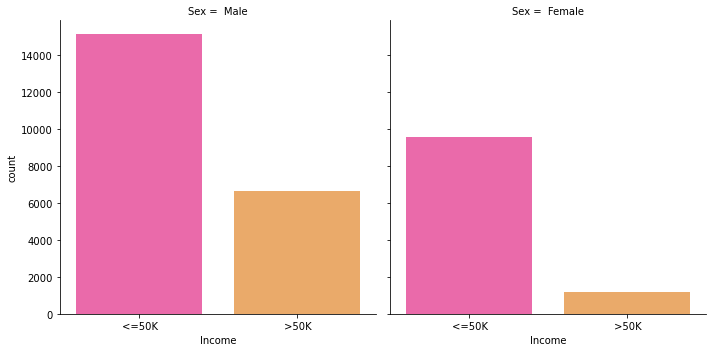

In [57]:
plt.figure(figsize = (10,10))
sns.catplot(x='Income',col='Sex',data=df,kind='count',palette="spring")
plt.show()

### More Male are paid income more than 50k than females and in Female are less who are paid above 50k

<Figure size 720x720 with 0 Axes>

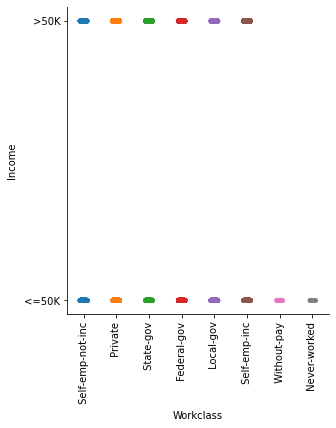

In [58]:
plt.figure(figsize = (10,10))
sns.catplot(x = "Workclass", y = "Income", data = df)
plt.xticks(rotation=90)
plt.show()

## These are sector where people are working with different income group

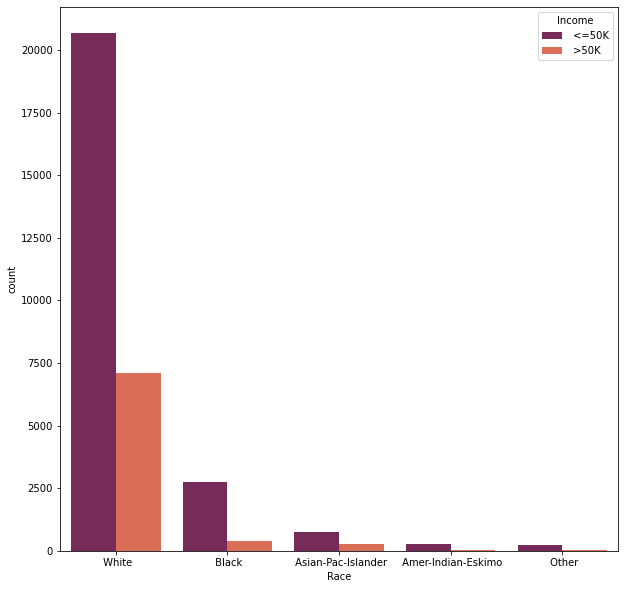

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(df['Race'],hue=df['Income'],data=df,palette="rocket")
plt.show()

# Here we can that White Race People are paid more as compared to and are more in number employed

<Figure size 720x720 with 0 Axes>

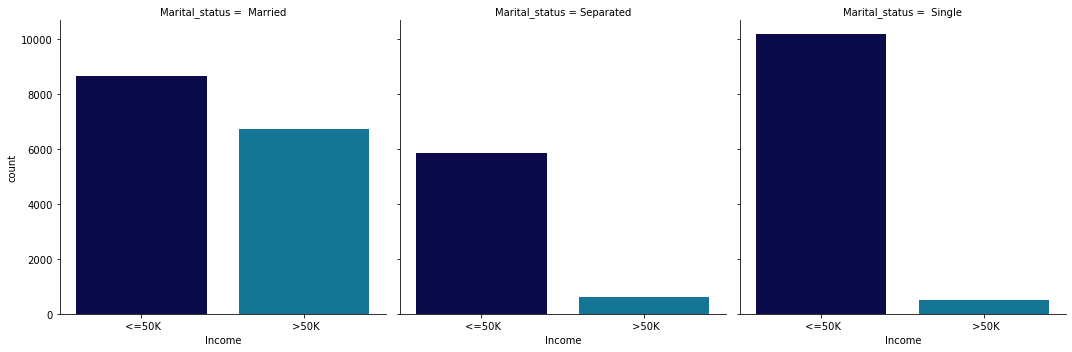

In [60]:
plt.figure(figsize=(10,10))
sns.catplot(x='Income',col='Marital_status',data=df,kind='count',palette="ocean")
plt.show()


## Here i can see that singles are having maximum income followed by Married people and least income is with Separated

<Figure size 720x720 with 0 Axes>

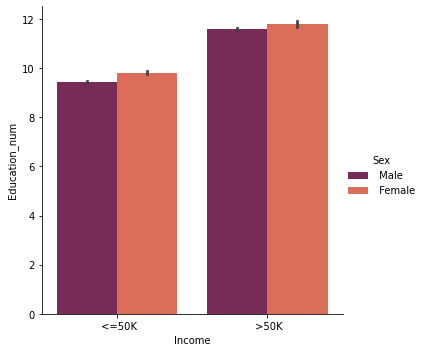

In [61]:
plt.figure(figsize = (10,10))
sns.catplot(x='Income',y='Education_num', data=df,kind='bar',hue="Sex",palette="rocket")
plt.show()


## The Income is more than 50K for the people having high education number. Here both gender have the income of more than 50K.

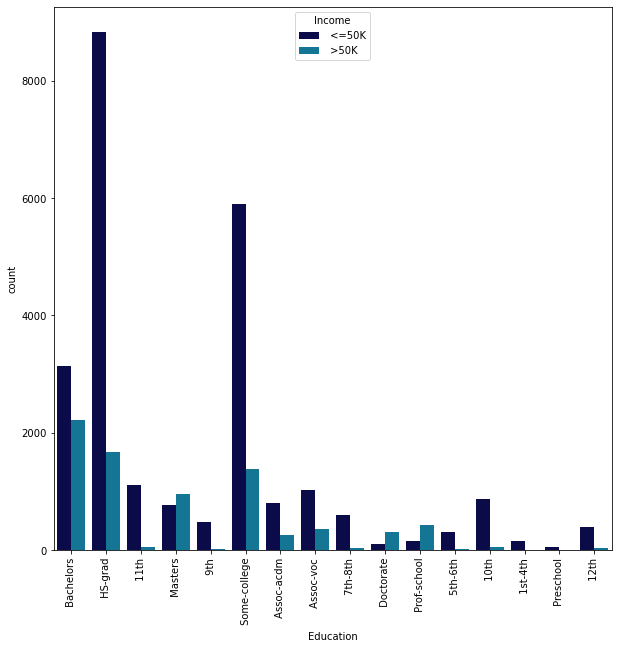

In [62]:
plt.figure(figsize = (10,10))
sns.countplot(df["Education"],hue=df["Income"],palette="ocean" )
plt.xticks(rotation=90)
plt.show()

## Here we can see that maximum income is paid to bachelors and the maximum people who are paid less than 50k belongs from HS-grad

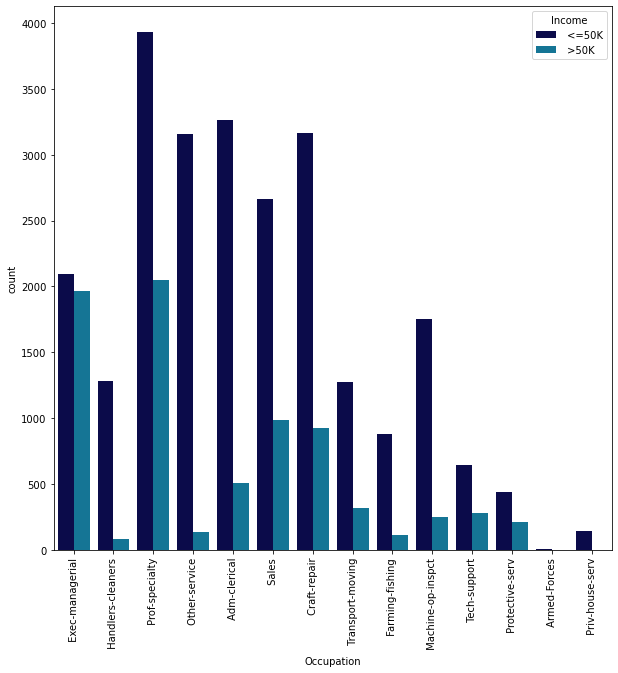

In [63]:
plt.figure(figsize = (10,10))
sns.countplot(df["Occupation"],hue=df["Income"],palette="ocean" )
plt.xticks(rotation=90)

plt.show()


## The maximum income is paid to Prof-speciality and Exec-managerial and the least is paid to Armed forces and Priv House Serv

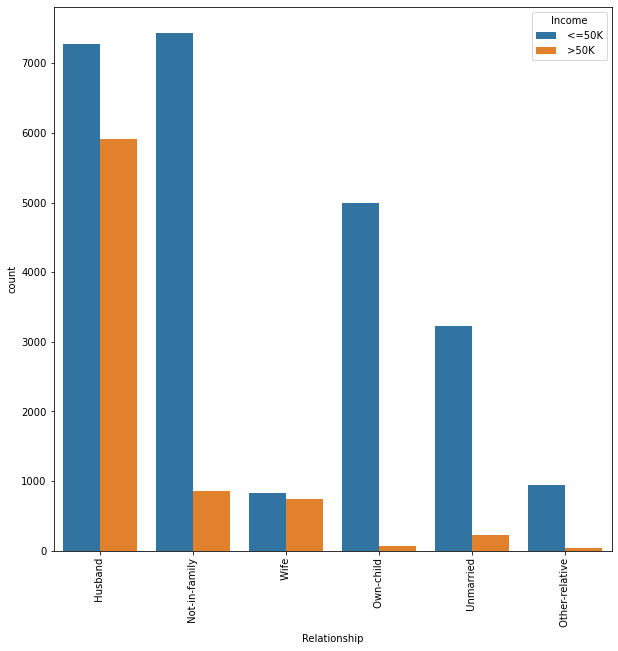

In [64]:
plt.figure(figsize=(10,10))
sns.countplot(df["Relationship"],hue=df["Income"] )
plt.xticks(rotation=90)
plt.show()

### In Relationship Columns Husband income are paid more as compared to all other relationship

<h2 style='text-align:center;font-size:40px;background-color:orange;border:40px;color:white'> C. Multi-variate Analysis <h2>

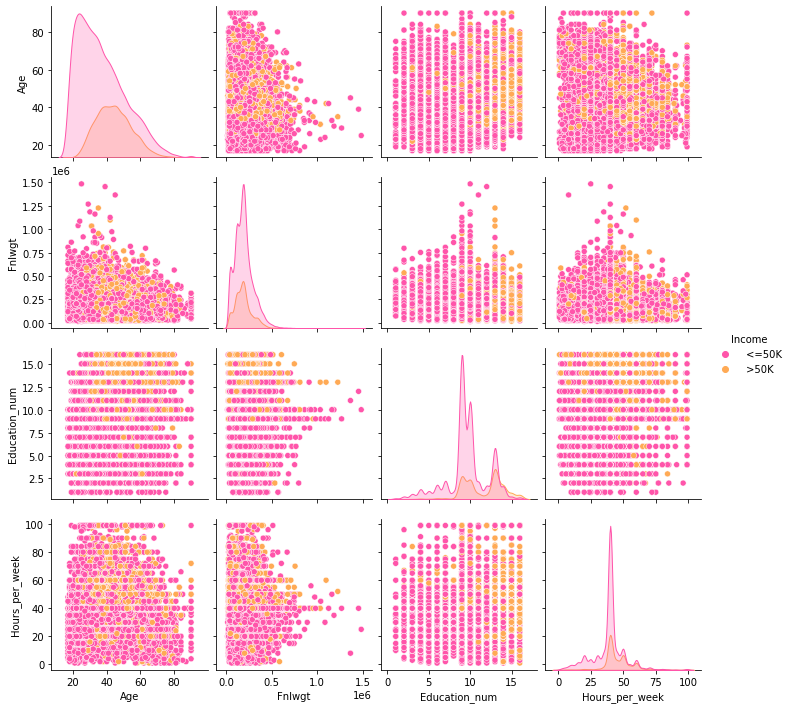

In [65]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="spring")

## This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Income". Here we can observe the relation between the features and label. 

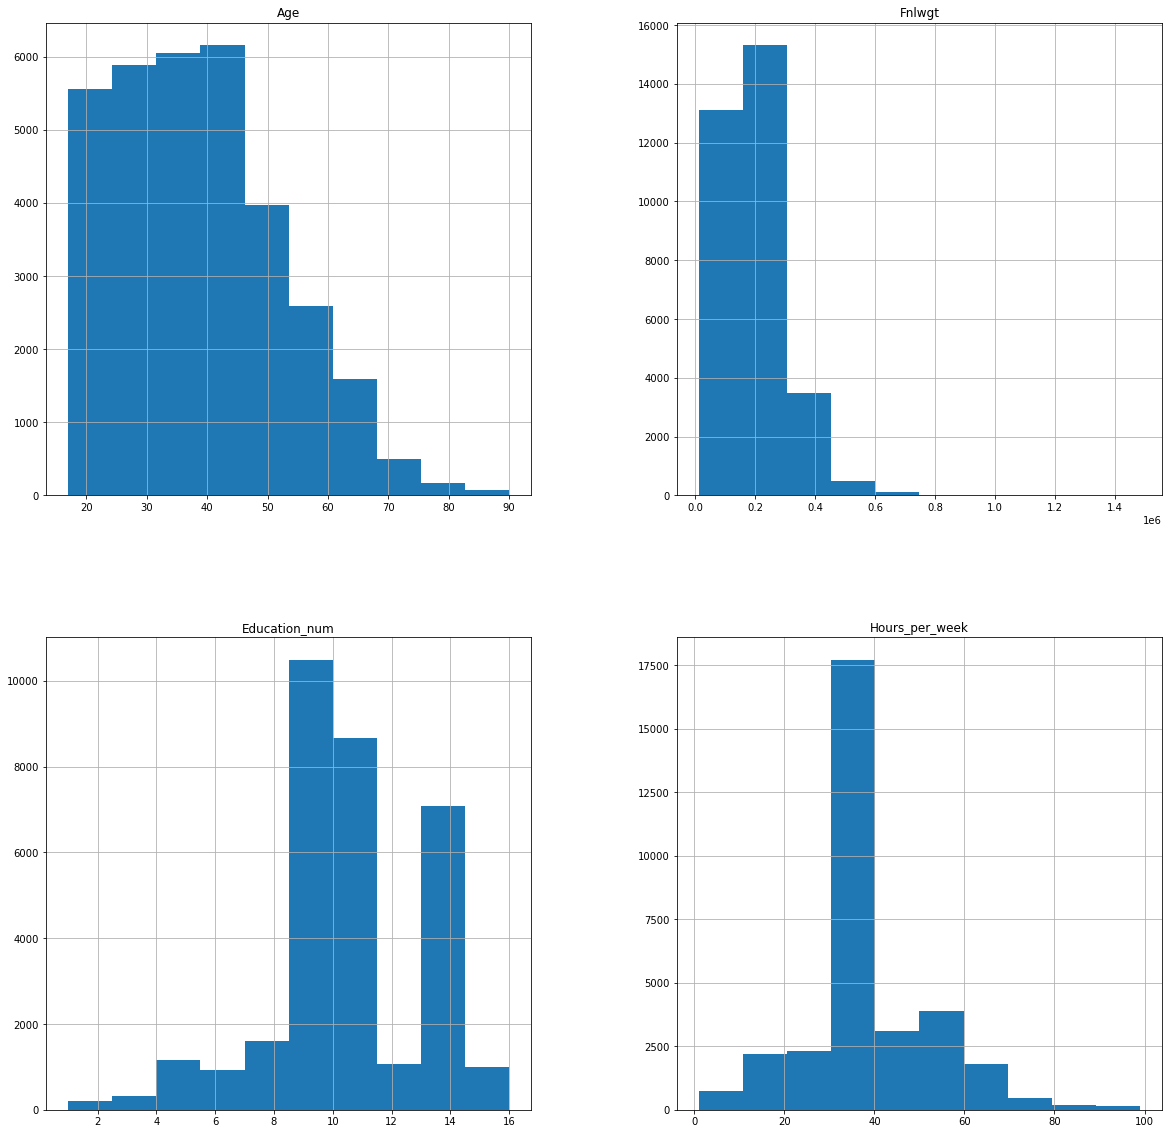

In [66]:
df.hist(bins=10, figsize=(20,20))
plt.show()

## We can see in catagorical columns lot of skewness is present. We are gonna a correct it later

Age                  AxesSubplot(0.125,0.787927;0.227941x0.0920732)
Fnlwgt            AxesSubplot(0.398529,0.787927;0.227941x0.0920732)
Education_num     AxesSubplot(0.672059,0.787927;0.227941x0.0920732)
Hours_per_week       AxesSubplot(0.125,0.677439;0.227941x0.0920732)
dtype: object

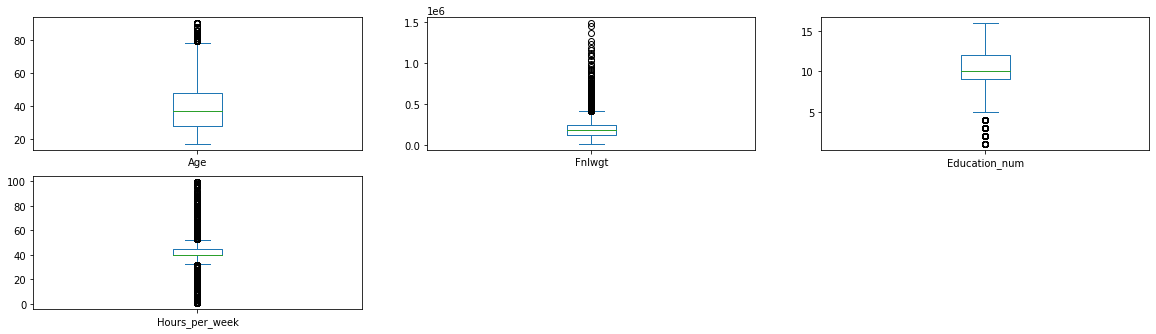

In [67]:
df.plot(kind='box',subplots=True,layout=(7,3),figsize=(20,20))

## All the Numerical columns are having Outliers ,we will remove it later

<h2 style='text-align:center;font-size:40px;background-color:black;border:40px;color:white'> CORRELATION <h2>

# Lets Convert all catagorical columns to into int format By Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [70]:
#Lets convert all catagorical columns to Int format

le = LabelEncoder()
Input = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

for i in Input:
    df[i] = le.fit_transform(df[i])

In [71]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,0,3,0,4,1,13,38,0
1,38,3,215646,11,9,2,5,1,4,1,40,38,0
2,53,3,234721,1,7,0,5,0,2,1,40,38,0
3,28,3,338409,9,13,0,9,5,2,0,40,4,0
4,37,3,284582,12,14,0,3,5,4,0,40,38,0


------------------------------

In [72]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,0.036224,-0.086520,0.001756,-0.263744,0.029116,0.088708,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,0.003412,-0.058514,0.007285,-0.057904,0.048322,0.071522,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,-0.043353,0.010242,-0.000073,0.008859,-0.021484,0.027113,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,0.359105,-0.000497,-0.041258,-0.011060,0.014307,-0.027426,0.055991,0.075498,0.079361
Education_num,0.036224,0.003412,-0.043353,0.359105,1.000000,-0.081747,0.070965,-0.094424,0.031998,0.012181,0.148426,0.088044,0.335299
Marital_status,-0.086520,-0.058514,0.010242,-0.000497,-0.081747,1.000000,-0.030024,0.457687,-0.066227,-0.440773,-0.152391,0.026723,-0.368802
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.070965,-0.030024,1.000000,-0.037443,-0.004789,0.047683,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,-0.094424,0.457687,-0.037443,1.000000,-0.116048,-0.582593,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,0.031998,-0.066227,-0.004789,-0.116048,1.000000,0.087464,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,0.012181,-0.440773,0.047683,-0.582593,0.087464,1.000000,0.229190,0.001745,0.215984


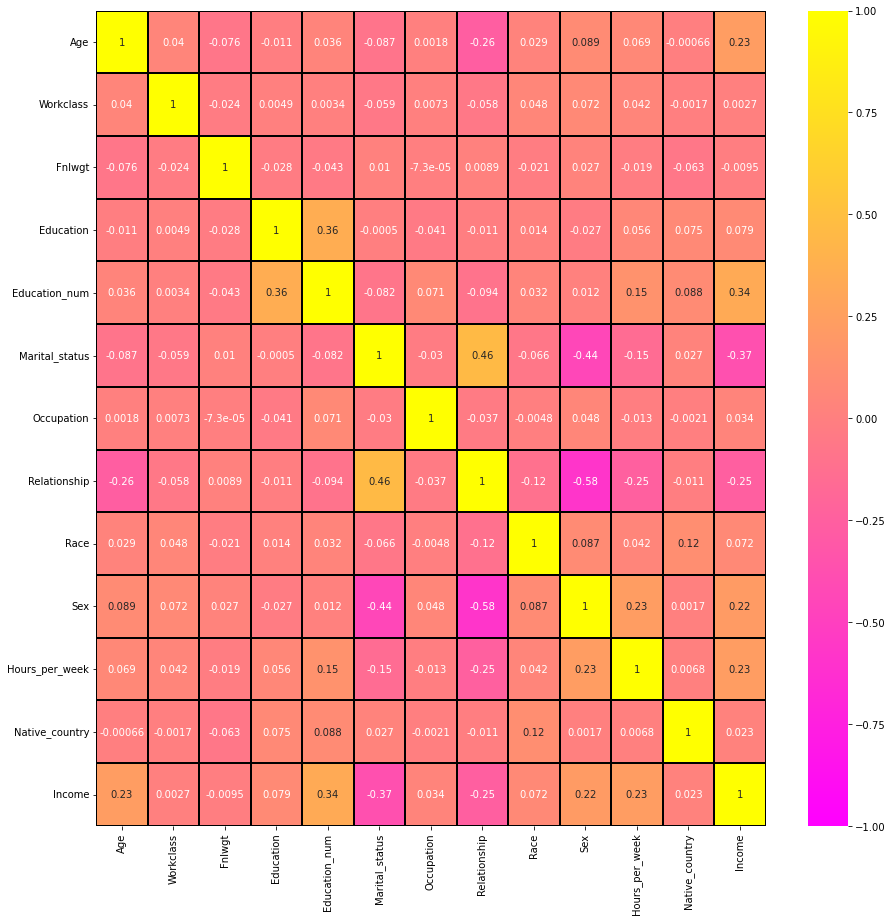

In [73]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="spring")
plt.yticks(rotation=0);

### This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

In [74]:
df.corr()['Income'].sort_values()

Marital_status   -0.368802
Relationship     -0.250955
Fnlwgt           -0.009521
Workclass         0.002747
Native_country    0.022858
Occupation        0.034490
Race              0.071855
Education         0.079361
Sex               0.215984
Hours_per_week    0.229659
Age               0.234039
Education_num     0.335299
Income            1.000000
Name: Income, dtype: float64

## We can see that some columns are Negatively correlated and some are positively correlated ..Max positively correlated column is :- Education_num and Max Negetively column is :- Marital Status

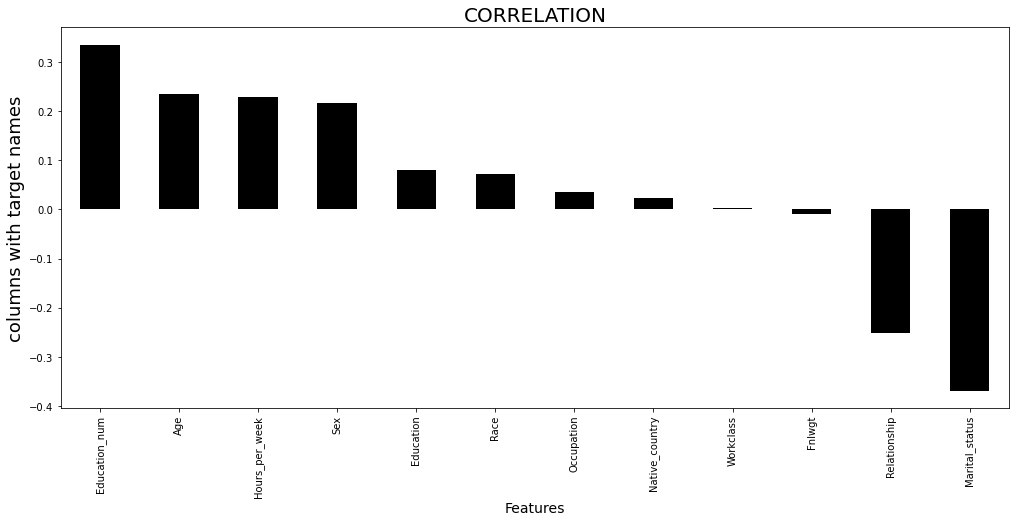

In [75]:
#checking the columns which are positively and negatively correlated

plt.figure(figsize=(17,7))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='black')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=18)
plt.title('CORRELATION',fontsize=20)
plt.show()

## Here we can see the least correlated columns are-> Workclass and Fnlwgt and the max postive and Negative correlated columns as Education_num and Marital Status.

<h2 style='text-align:center;font-size:40px;background-color:green;border:40px;color:white'> DESCRIPTIVE STATISTICS <h2>

In [76]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.094357,1.897843e+05,10.297547,10.081725,0.724859,6.139476,1.446552,3.665816,0.669228,40.440343,36.419136,0.240933
std,13.638193,1.107449,1.055563e+05,3.870195,2.571622,0.772330,3.973089,1.607087,0.848858,0.470498,12.347079,6.053903,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,0.000000,3.000000,0.000000,4.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,1.000000,6.000000,1.000000,4.000000,1.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.369932e+05,12.000000,12.000000,1.000000,9.000000,3.000000,4.000000,1.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,2.000000,13.000000,5.000000,4.000000,1.000000,99.000000,40.000000,1.000000


## We can see all columns having count 32536. Looks like it doesn't contain missing values.

<AxesSubplot:>

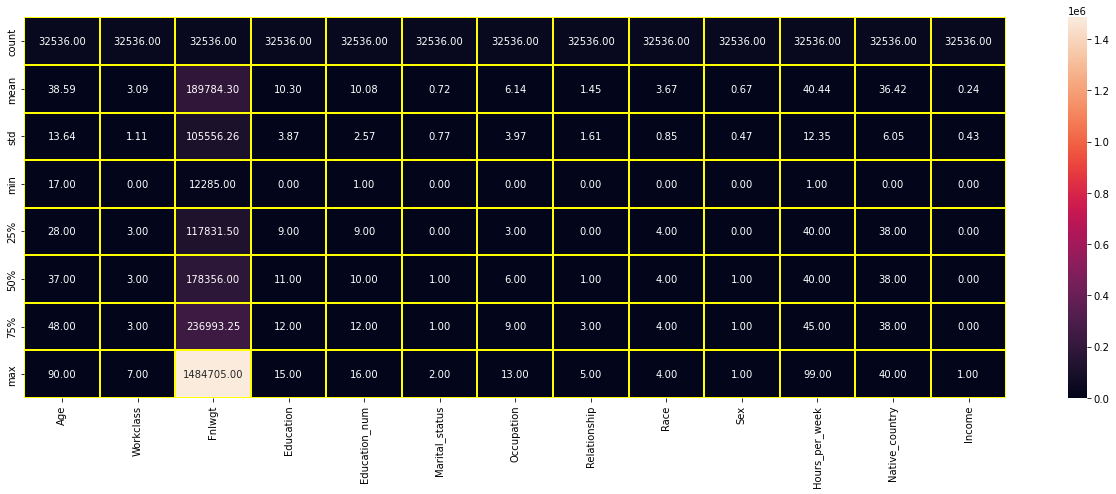

In [77]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.2,linecolor="yellow",fmt="0.2f")

## Outcome of describe() of dataset :-
**from the above plotting we are determining mean,standard deviation,minimum and maximum value of each column**

**Total number rows and column in dataset:-**

**`Rows` :- `32536`**

**`columns` :- `13`**

<h2 style='text-align:center;font-size:50px;background-color:orange;border:50px;color:black'> Lets Check Skewness <h2>


In [78]:
df.skew()

Age               0.557657
Workclass         0.075983
Fnlwgt            1.447695
Education        -0.934180
Education_num    -0.309454
Marital_status    0.516735
Occupation        0.000407
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Hours_per_week    0.228752
Native_country   -4.247065
Income            1.211640
dtype: float64

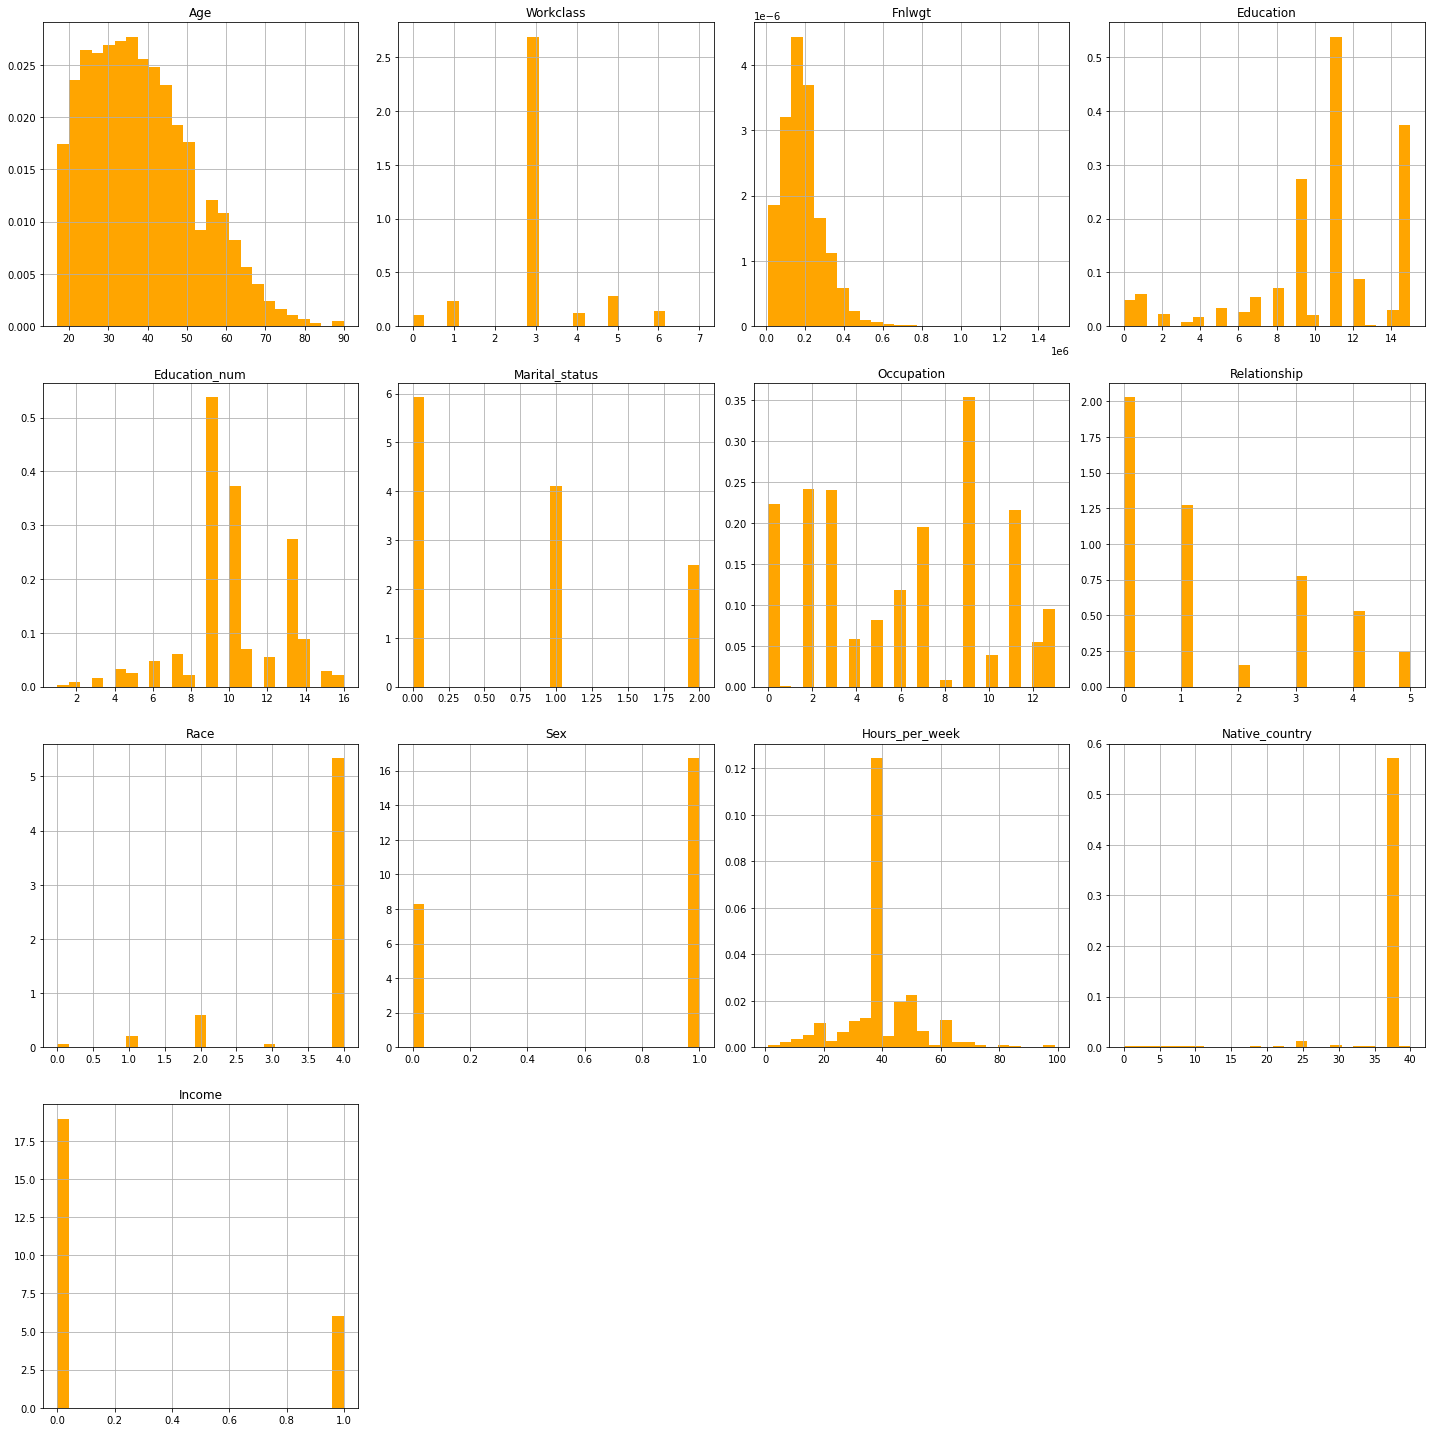

In [79]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
df.hist(bins=25,color='orange',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

## This plot show Skewness in all the columns ..

<h2 style='text-align:center;font-size:50px;background-color:Black;border:30px;color:green'> Now Lets Remove Outliers Now <h2>

# ZSCORE METHOD

In [80]:
# Features containing outliers
features = df[["Age","Fnlwgt","Education_num","Hours_per_week"]]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.836961,1.008703,1.134817,2.222450
1,0.042934,0.245008,0.420646,0.035664
2,1.056935,0.425720,1.198377,0.035664
3,0.776180,1.408036,1.134817,0.035664
4,0.116259,0.898091,1.523683,0.035664
...,...,...,...,...
32555,0.849505,0.639647,0.745951,0.197648
32556,0.103715,0.335469,0.420646,0.035664
32557,1.423558,0.358812,0.420646,0.035664
32558,1.216128,0.110897,0.420646,1.655506


In [81]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,0,3,0,4,1,13,38,0
1,38,3,215646,11,9,2,5,1,4,1,40,38,0
2,53,3,234721,1,7,0,5,0,2,1,40,38,0
3,28,3,338409,9,13,0,9,5,2,0,40,4,0
4,37,3,284582,12,14,0,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,0,12,5,4,0,38,38,0
32556,40,3,154374,11,9,0,6,0,4,1,40,38,1
32557,58,3,151910,11,9,2,0,4,4,0,40,38,0
32558,22,3,201490,11,9,1,0,3,4,1,20,38,0


In [82]:
df_new.shape

(31442, 13)

In [83]:
df.shape

(32536, 13)

In [84]:
# Percentage of data loss

DataLoss=((32536-31442)/32536)*100
DataLoss

3.362429309073027

## 3.362429309073027% is the data lossed during removal of Outliers by ZScore Method

# IQR METHOD

In [85]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
qq=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [86]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",qq.shape)
print("\nTotal Dropped rows:",df.shape[0]-qq.shape[0])

Old DataFrame data in Rows and Column: (32536, 13)

New DataFrame data in Rows and Column: (9100, 13)

Total Dropped rows: 23436


In [87]:
#Percentage Data Loss using IQR
data_loss1 = (32536-9100)/32536*100
data_loss1

72.03098106712564

## 72.03098106712564% is the data lossed during removal of Outliers by IQR Method


# SO HERE WE WILL GO WITH ZSCORE METHOD BECAUSE IT HAS LESS DATALOSS AS COMPARED TO IQR

<h2 style='text-align:center;font-size:40px;background-color:purple;border:30px;color:white'> *Now Lets Remove Skewness Now* <h2>

In [88]:
L1=['Age','Fnlwgt','Education_num']

In [89]:
# Lets remove the skewness from given columns by Power Transform Method

from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')

In [90]:
#Removing skewness using yeo-johnson
df_new[['Age','Fnlwgt','Education_num']] = PT.fit_transform(df_new[['Age','Fnlwgt','Education_num']].values)

In [91]:
#Checking skewness after removing skewness by power transform
df_new.skew()

Age              -0.019692
Workclass         0.077211
Fnlwgt           -0.034376
Education        -0.949535
Education_num     0.019859
Marital_status    0.513001
Occupation        0.003032
Relationship      0.777473
Race             -2.453694
Sex              -0.708609
Hours_per_week   -0.340717
Native_country   -4.362258
Income            1.205437
dtype: float64

## We can see that the skewness from all the columns ahve been removed except the catagorical columns

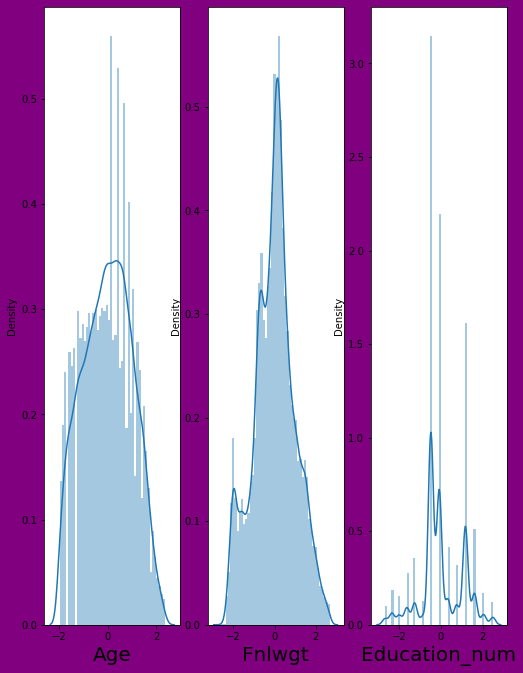

In [92]:
#After removing let's check how the data has been distributed in each column of skew_features.

plt.figure(figsize=(20,25), facecolor='purple')
plotnumber = 1

for column in df_new[L1]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Now all the columns are Normalized and skewness free

<h2 style='text-align:center;font-size:30px;background-color:Black;border:30px;color:white'> Now Lets Split the dataset into dependent and independent variable <h2>

In [93]:
df_new.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,0.915328,5,-1.114219,9,1.169345,0,3,0,4,1,13,38,0
1,0.109567,3,0.427172,11,-0.483530,2,5,1,4,1,40,38,0
2,1.092811,3,0.607275,1,-1.260475,0,5,0,2,1,40,38,0
3,-0.730297,3,1.487480,9,1.169345,0,9,5,2,0,40,4,0
4,0.033874,3,1.048834,12,1.600146,0,3,5,4,0,40,38,0


In [94]:
x=df_new.loc [:,df_new.columns != 'Income']
# Independent Variable

In [95]:
y=df_new.loc[:,'Income']
#Dependent Variable

In [96]:
x.shape

(31442, 12)

In [97]:
y.shape

(31442,)

<h2 style='text-align:center;font-size:40px;background-color:Black;border:40px;color:green'> Now Lets Scale The Dataset <h2>

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.915328,1.722296,-1.114219,-0.347917,1.169345,-0.941403,-0.784467,-0.903169,0.391337,0.706618,-2.424850,0.254026
1,0.109567,-0.080411,0.427172,0.172453,-0.483530,1.651072,-0.282499,-0.282026,0.391337,0.706618,-0.008621,0.254026
2,1.092811,-0.080411,0.607275,-2.429398,-1.260475,-0.941403,-0.282499,-0.903169,-1.969449,0.706618,-0.008621,0.254026
3,-0.730297,-0.080411,1.487480,-0.347917,1.169345,-0.941403,0.721438,2.202549,-1.969449,-1.415192,-0.008621,-5.456787
4,0.033874,-0.080411,1.048834,0.432638,1.600146,-0.941403,-0.784467,2.202549,0.391337,-1.415192,-0.008621,0.254026
...,...,...,...,...,...,...,...,...,...,...,...,...
31437,-0.826439,-0.080411,0.812065,-0.868287,0.745150,-0.941403,1.474391,2.202549,0.391337,-1.415192,-0.187601,0.254026
31438,0.256439,-0.080411,-0.207358,0.172453,-0.483530,-0.941403,-0.031515,-0.903169,0.391337,0.706618,-0.008621,0.254026
31439,1.371918,-0.080411,-0.235086,0.172453,-0.483530,1.651072,-1.537420,1.581405,0.391337,-1.415192,-0.008621,0.254026
31440,-1.352760,-0.080411,0.288773,0.172453,-0.483530,0.354835,-1.537420,0.960262,0.391337,0.706618,-1.798420,0.254026


# WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [102]:
vif_cal()

    VIF FACTOR        FEATURES
0     1.112975             Age
1     1.008701       Workclass
2     1.010718          Fnlwgt
3     1.130088       Education
4     1.176511   Education_num
5     1.351076  Marital_status
6     1.015722      Occupation
7     1.807218    Relationship
8     1.031676            Race
9     1.655209             Sex
10    1.122723  Hours_per_week
11    1.025274  Native_country


## No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models....

# Balancing the dataset over here,otherwise it will be a baised dataset

In [103]:
from imblearn.over_sampling import SMOTE

In [142]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [105]:
x.shape

(47672, 12)

In [106]:
y.shape

(47672,)

<AxesSubplot:xlabel='Income', ylabel='count'>

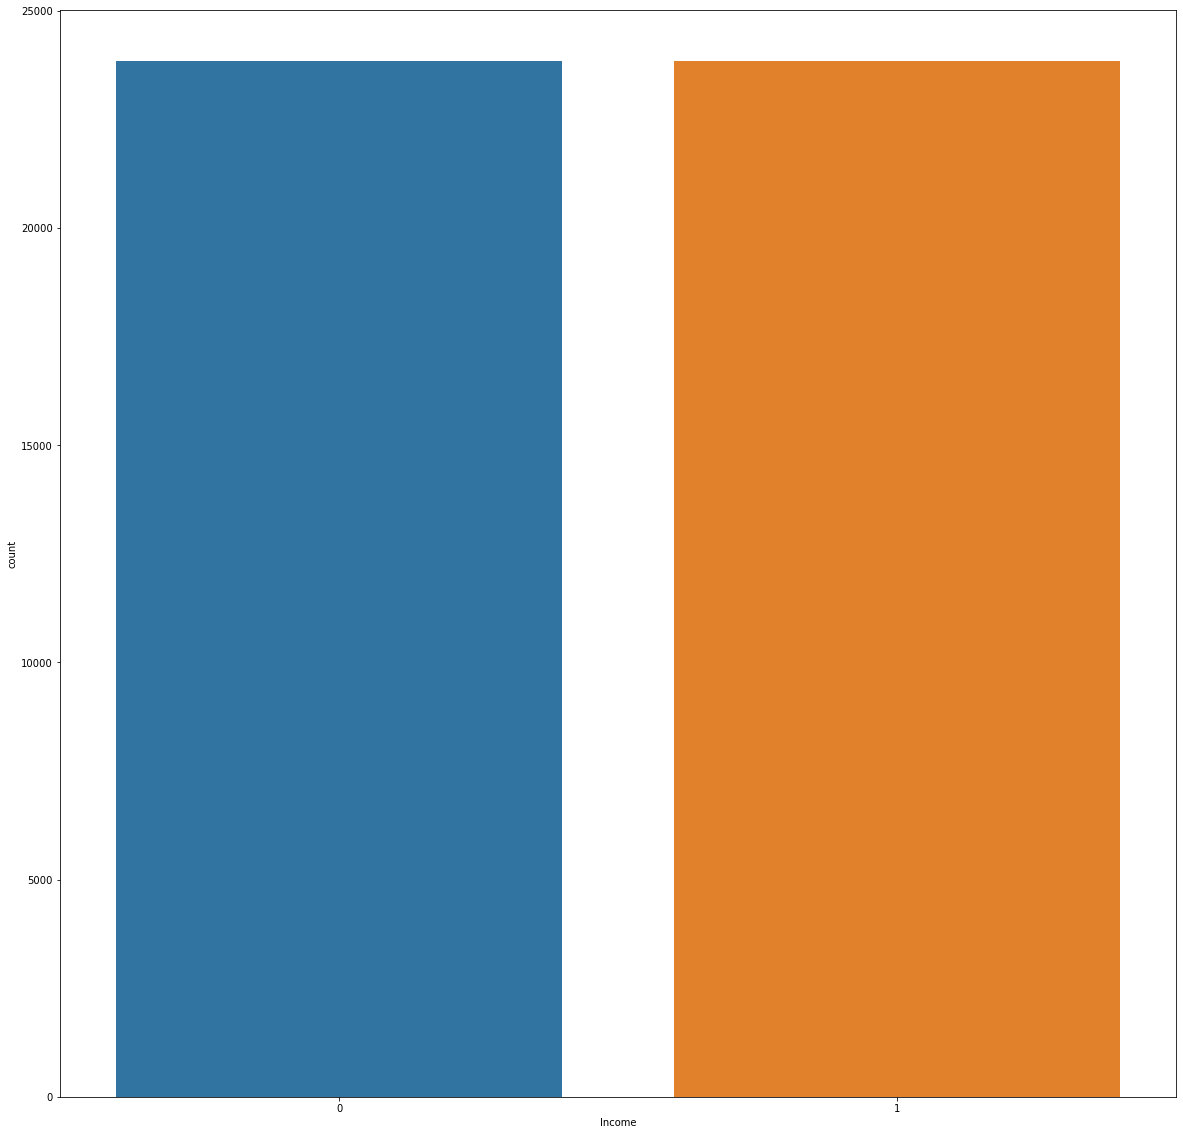

In [107]:
sns.countplot(y)

# Model Training and Testing

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
lr=LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(pred_train,y_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state ",i," The model performs very well")
        print("At random_state:-",i)
        print("Training accuaracy_score is :-",round(accuracy_score(y_train,pred_train)*100,1))
        print("Testing accuracy_score is:-",round(accuracy_score(y_test,pred_test)*100,1),  '\n\n')

At random state  25  The model performs very well
At random_state:- 25
Training accuaracy_score is :- 79.4
Testing accuracy_score is:- 79.4 


At random state  42  The model performs very well
At random_state:- 42
Training accuaracy_score is :- 79.3
Testing accuracy_score is:- 79.3 


At random state  47  The model performs very well
At random_state:- 47
Training accuaracy_score is :- 79.3
Testing accuracy_score is:- 79.3 


At random state  53  The model performs very well
At random_state:- 53
Training accuaracy_score is :- 79.4
Testing accuracy_score is:- 79.4 


At random state  71  The model performs very well
At random_state:- 71
Training accuaracy_score is :- 79.3
Testing accuracy_score is:- 79.3 




In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=15)

In [112]:
lr.fit(x_train,y_train)

LogisticRegression()

In [113]:
pred_train=lr.predict(x_train)

In [114]:
pred_test=lr.predict(x_test)

In [115]:
accuracy_score(y_test,pred_test)

0.7998951232302045

In [116]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      4778
           1       0.78      0.83      0.81      4757

    accuracy                           0.80      9535
   macro avg       0.80      0.80      0.80      9535
weighted avg       0.80      0.80      0.80      9535



## CROSS VALIDATION FOR LOGISTICS REGRESSION

In [118]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)

In [119]:
for i in range(3,10):
    lsscore=cross_val_score(lr,x,y,cv=i)
    lsc=lsscore.mean()
    print ("At cv:-",i)
    print ("Cross validation score is :-",lsc*100)
    print ("Accuracy_score is :-",lss*100)
    print ("\n")

At cv:- 3
Cross validation score is :- 79.428187599133
Accuracy_score is :- 79.98951232302045


At cv:- 4
Cross validation score is :- 79.35895284443698
Accuracy_score is :- 79.98951232302045


At cv:- 5
Cross validation score is :- 79.38414059515311
Accuracy_score is :- 79.98951232302045


At cv:- 6
Cross validation score is :- 79.35897283588916
Accuracy_score is :- 79.98951232302045


At cv:- 7
Cross validation score is :- 79.34848047635279
Accuracy_score is :- 79.98951232302045


At cv:- 8
Cross validation score is :- 79.34007383789225
Accuracy_score is :- 79.98951232302045


At cv:- 9
Cross validation score is :- 79.35266280615241
Accuracy_score is :- 79.98951232302045




In [120]:
# I will take CV as 5 bcz its close to accuracy score
lsscore_selected= cross_val_score(lr,x,y,cv=5).mean()
print ("The cv score is :- ",lsscore_selected,"\nThe accuracy_score is:",lss)

The cv score is :-  0.7938414059515311 
The accuracy_score is: 0.7998951232302045


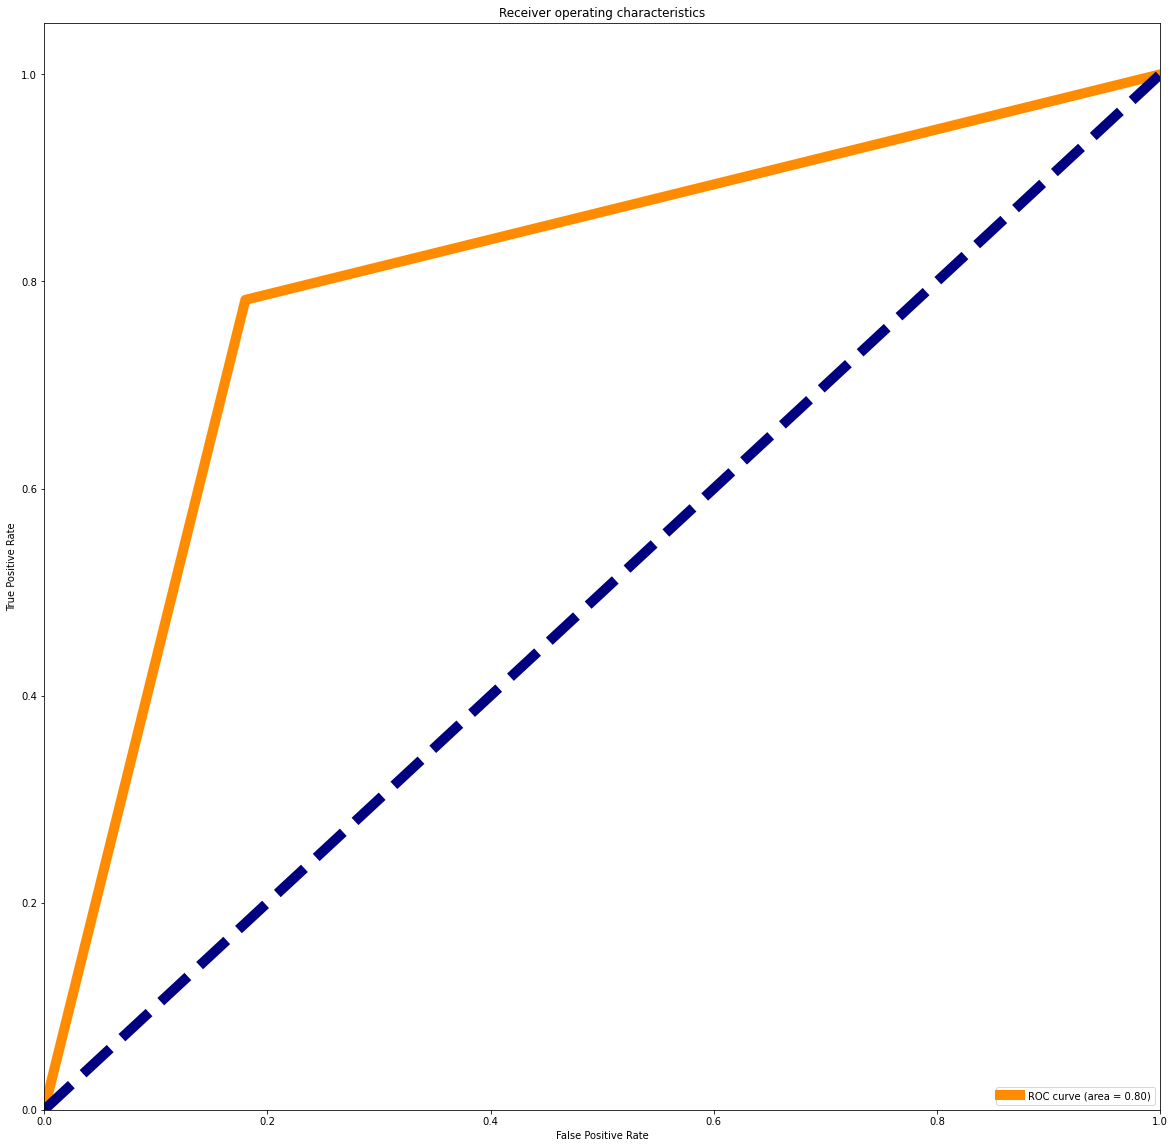

In [121]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(pred_test,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

### We can see that 80% of area is inside AUC ROC curve Which is good

## DECISION TREE CLASSIFIER

In [122]:
# Checking Accuracy for Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

#Prediction
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))
print('CV  :-',cross_val_score(dt,x,y,cv=5).mean())


0.8340849501835343
[[3972  806]
 [ 776 3981]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      4778
           1       0.83      0.84      0.83      4757

    accuracy                           0.83      9535
   macro avg       0.83      0.83      0.83      9535
weighted avg       0.83      0.83      0.83      9535

CV  :- 0.8293781898779947


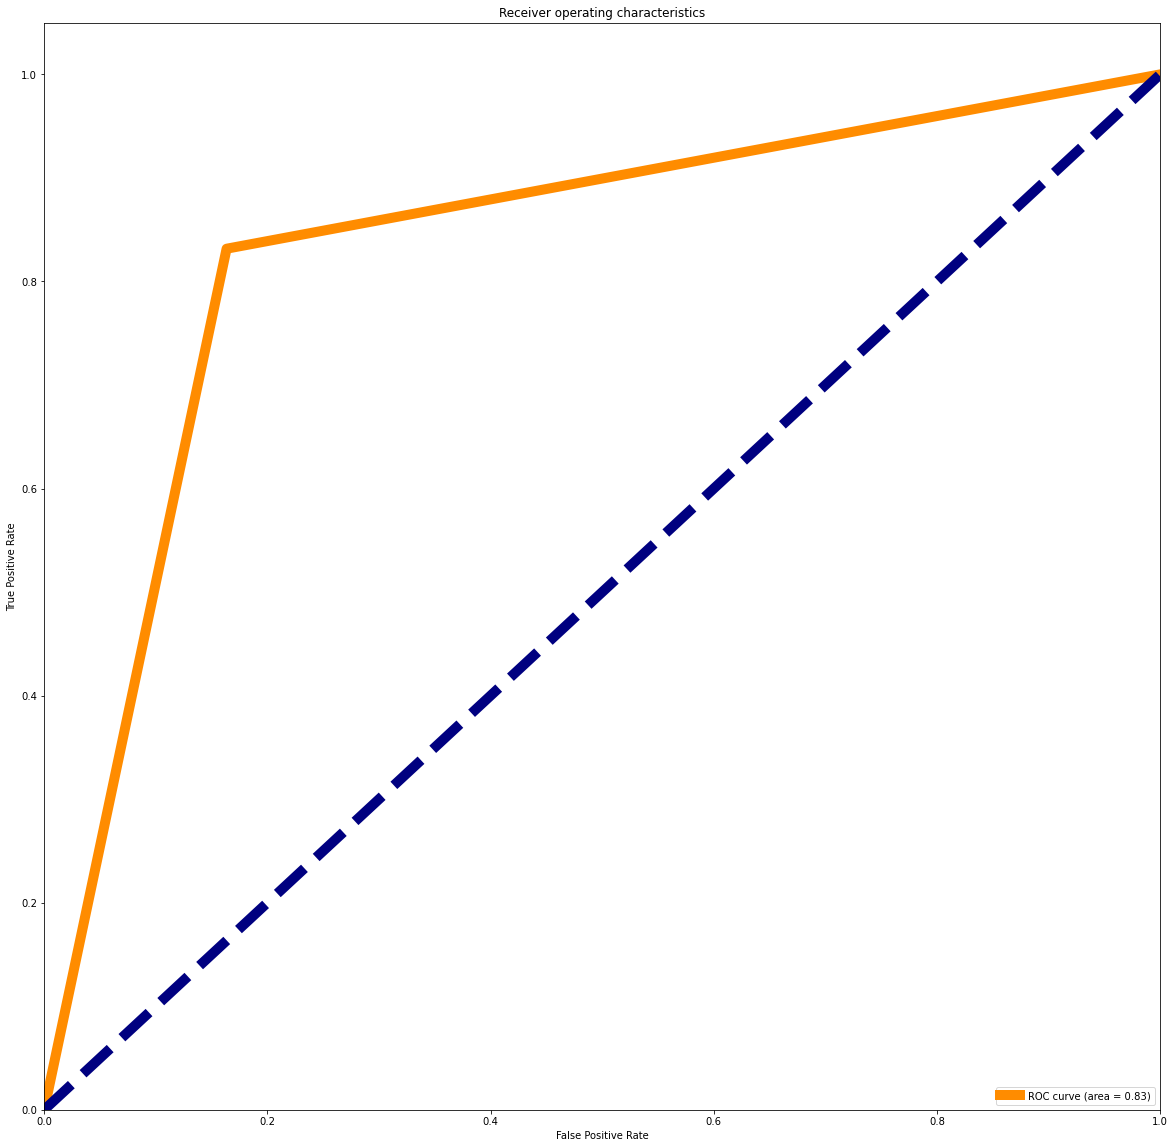

In [123]:
fpr,tpr,threshold=roc_curve(preddt,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## We can see that 83% of area is inside AUC ROC curve Which is good

# KNeighbors Classifier

In [124]:
# Checking accuracy for KNeighbors Classifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))
print('CV  :-',cross_val_score(knn,x,y,cv=5).mean())


0.8469847928683797
[[3678 1100]
 [ 359 4398]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      4778
           1       0.80      0.92      0.86      4757

    accuracy                           0.85      9535
   macro avg       0.86      0.85      0.85      9535
weighted avg       0.86      0.85      0.85      9535

CV  :- 0.847059645445236


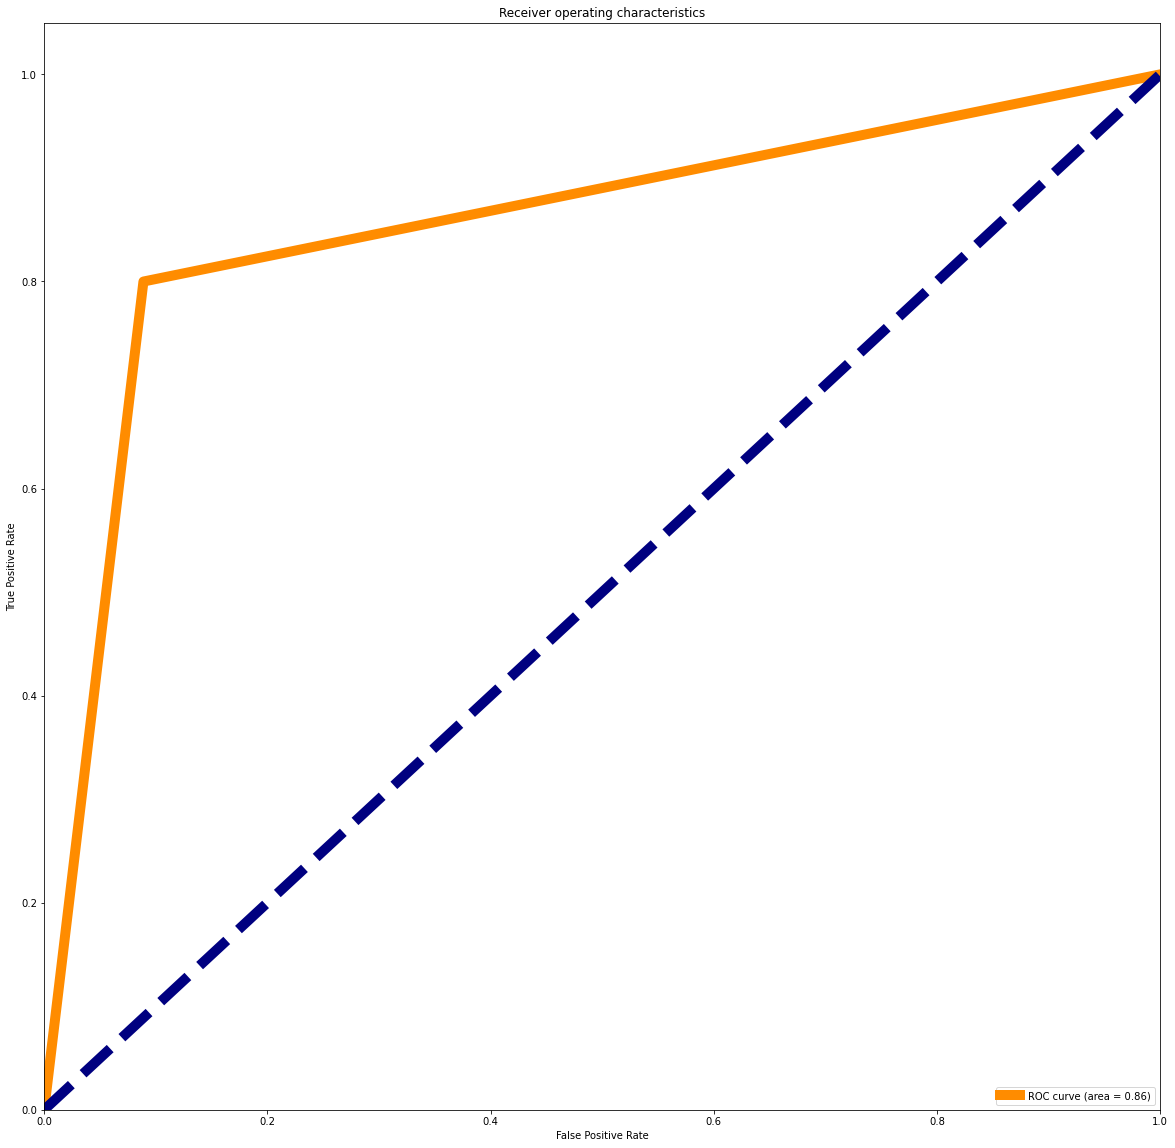

In [125]:
fpr,tpr,threshold=roc_curve(predknn,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## We can see that 86% of area is inside AUC ROC curve Which is good

## ENSEMBLE TECHNIQUE

In [126]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))
print('CV  :-',cross_val_score(rf,x,y,cv=5).mean())


0.8839014158363923
[[4160  618]
 [ 489 4268]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4778
           1       0.87      0.90      0.89      4757

    accuracy                           0.88      9535
   macro avg       0.88      0.88      0.88      9535
weighted avg       0.88      0.88      0.88      9535

CV  :- 0.8827215136751763


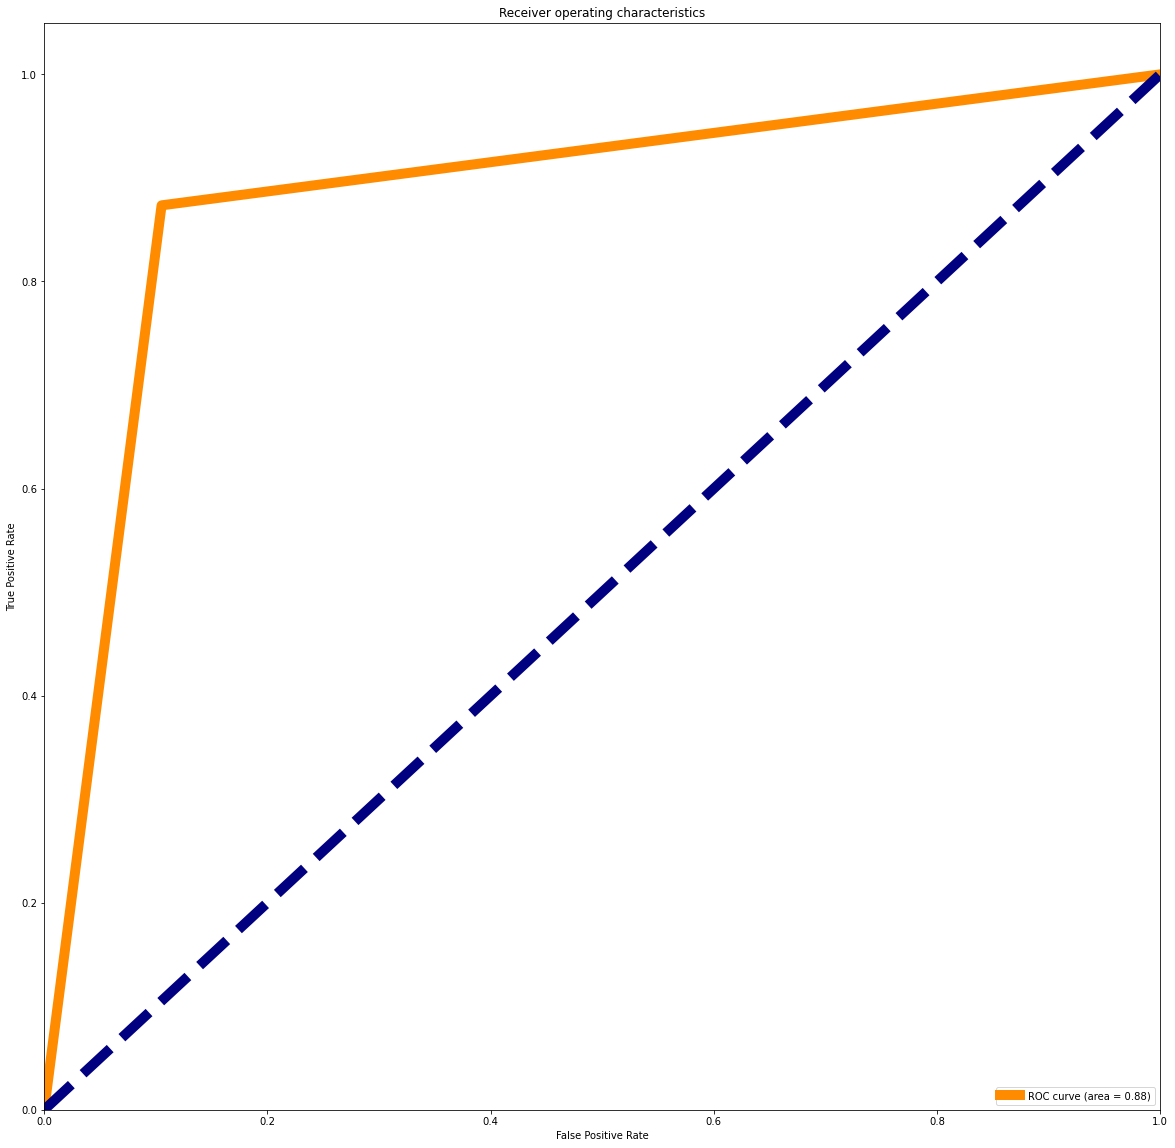

In [127]:
fpr,tpr,threshold=roc_curve(predrf,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

# We can see that 88% of area is inside AUC ROC curve Which is very good

In [128]:
# Checking accuracy for Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

print('CV  :-',cross_val_score(gb,x,y,cv=5).mean())


0.8529627687467226
[[3903  875]
 [ 527 4230]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      4778
           1       0.83      0.89      0.86      4757

    accuracy                           0.85      9535
   macro avg       0.85      0.85      0.85      9535
weighted avg       0.85      0.85      0.85      9535

CV  :- 0.8455919910844847


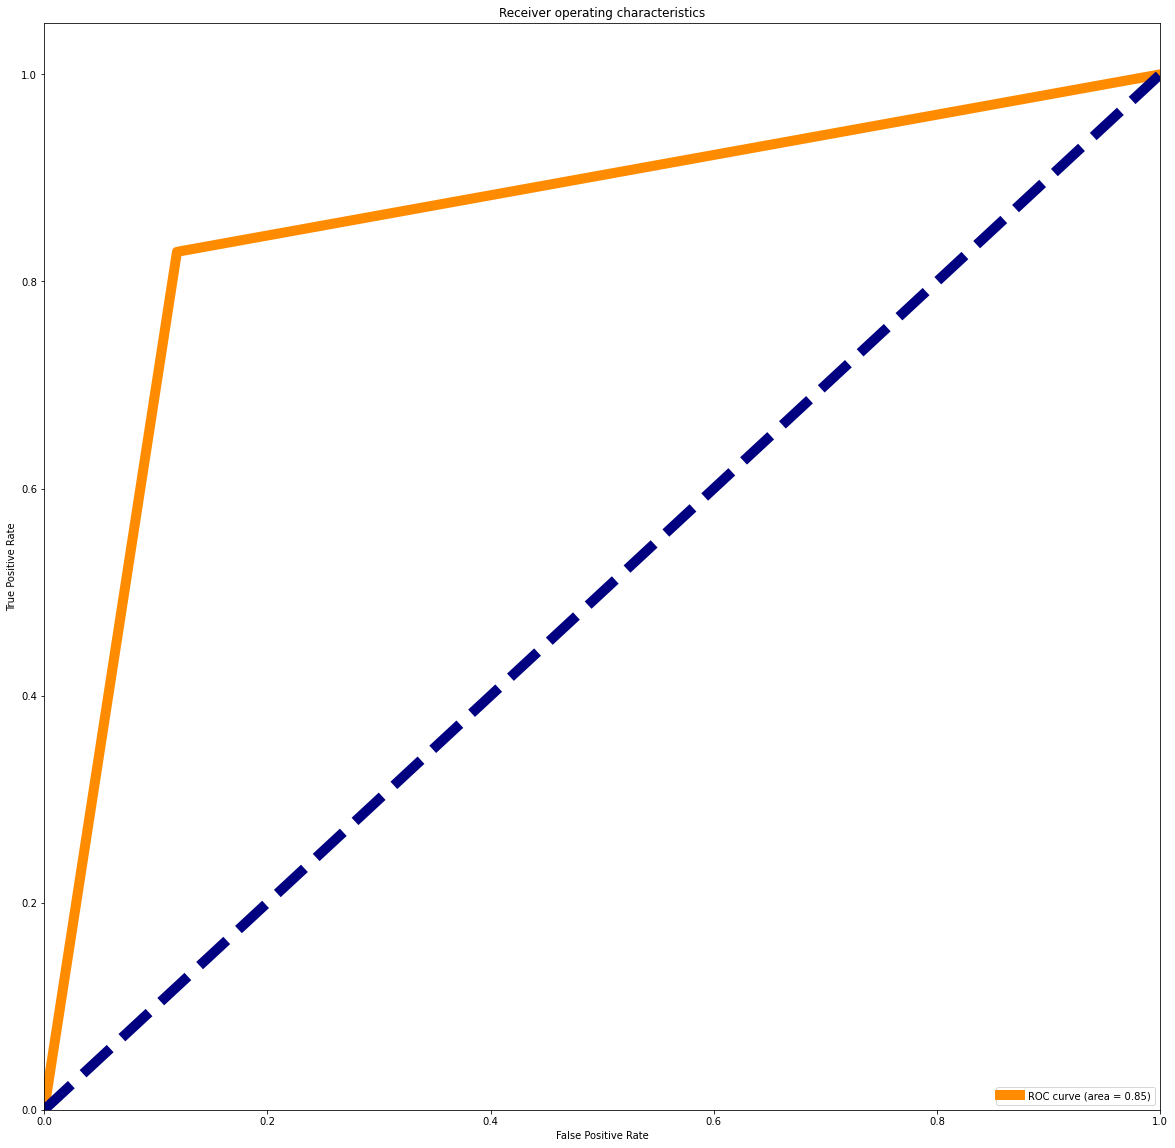

In [129]:
fpr,tpr,threshold=roc_curve(predgb,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

## We can see that 85% area are under AUC ROC curce which is very good but not as good as Random forest classifier

In [130]:
mm=pd.DataFrame([["LR","80%"],["Decision Tree Classifier","84%"],["KNeighbors Classifier","85%"],["Random Forest Classifier","88%"],["Gradient Boosting","85%"]],
                    columns=["Model_Name","AccuracyScore"])

mm

,Model_Name,AccuracyScore
0,LR,80%
1,Decision Tree Classifier,84%
2,KNeighbors Classifier,85%
3,Random Forest Classifier,88%
4,Gradient Boosting,85%


### Random Forest Classifier is performing the best 

# Hyperparameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV


In [132]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [133]:
#RandomForestClassifier
parameters = {'bootstrap' : [True, False],'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[2,200],
             'max_depth':[2,3,4,6,7,8,10,12,14,16,18,20,22,24,26,28,30]}

In [134]:
qq=GridSearchCV(RandomForestClassifier(),parameters,cv=5)


In [135]:
qq.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 6, 7, 8, 10, 12, 14, 16, 18, 20,
                                       22, 24, 26, 28, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [2, 200]})

In [136]:
qq.best_params_

{'bootstrap': False,
 'max_depth': 26,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [137]:
rf = RandomForestClassifier(bootstrap = True,max_depth=28, max_features='sqrt', n_estimators=200)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print('Accuracy_Score :-> ',accuracy_score(y_test,pred)*100)

Accuracy_Score :->  88.52648138437335


## Our Accuracy score is same as Earlier but still it is the best so far so we will gowith ds only (89%)

# Now save the final model

In [138]:
#Saving the model using .pkl
import joblib
joblib.dump(rf,"Census_study.pkl")

['Census_study.pkl']

In [139]:
#Loading the saved model
aa=joblib.load("Census_study.pkl")

In [140]:
#Prediction
prediction = aa.predict(x_test)
prediction

array([0, 0, 1, ..., 1, 0, 1])

In [141]:
pd.DataFrame([aa.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,9525,9526,9527,9528,9529,9530,9531,9532,9533,9534
Predicted,0,0,1,0,1,1,1,1,0,0,...,1,0,0,0,1,1,1,1,0,1
Original,1,0,1,1,1,0,1,1,0,0,...,1,1,0,0,1,0,1,1,0,1


# This Project is completed here